In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('fly.csv')

In [27]:
df.tail()

,ds,y,Date
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01
143,1960-12,432,1960-12-01


<AxesSubplot:>

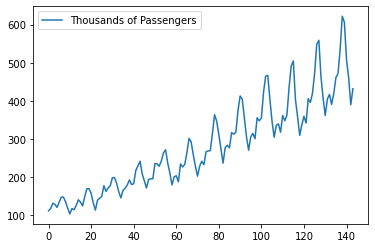

In [6]:
df.plot()

In [7]:
df.columns = ['ds','y']

In [8]:
df

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df['Date'] = pd.to_datetime(df['ds'])

In [10]:
df.dtypes

ds              object
y                int64
Date    datetime64[ns]
dtype: object

In [14]:
df.drop("Date", axis = 1)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [29]:
from fbprophet import Prophet

In [17]:
dir(Prophet)
model = Prophet()

In [18]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [21]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
future_dates = model.make_future_dataframe(periods = 365)

In [28]:
prediction = model.predict(future_dates)

In [30]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,54.314652,112.129262,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,48.060148,105.178554,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,82.765167,139.308745,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,80.118822,135.240345,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,82.807878,138.135549,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


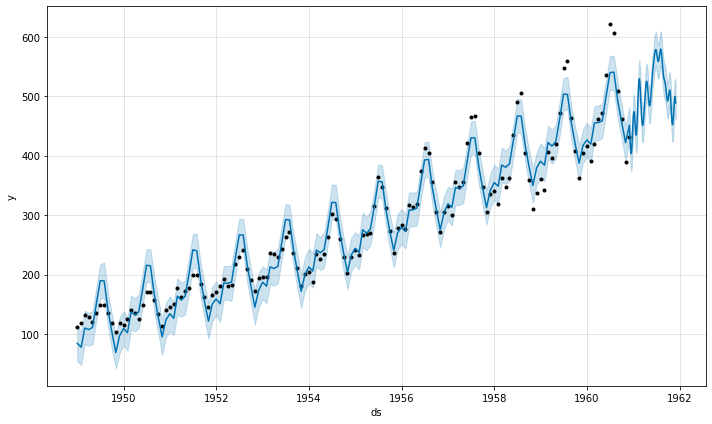

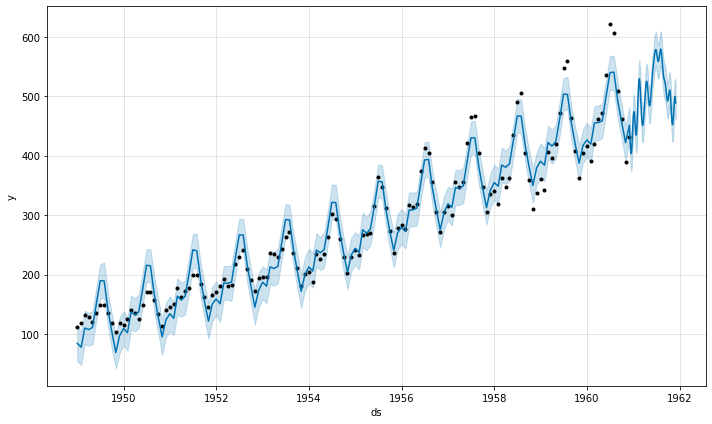

In [31]:
model.plot(prediction)

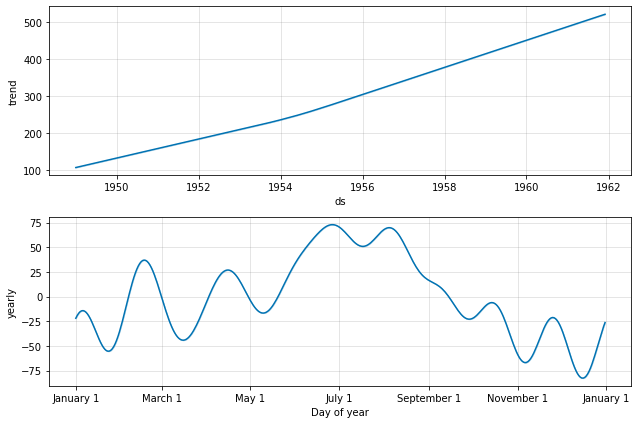

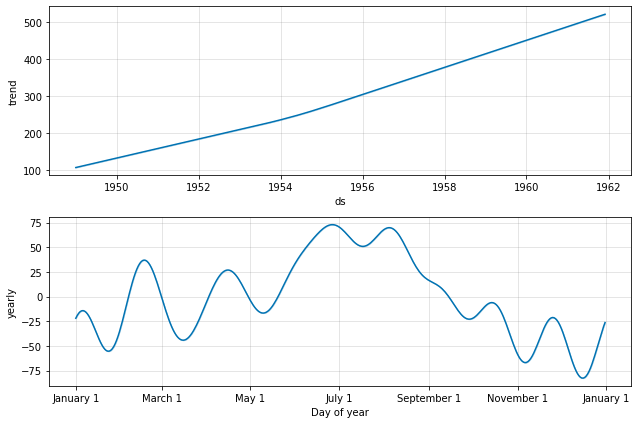

In [32]:
model.plot_components(prediction)

# Time Series Analysis
### 1960-1962 split into:
1960-61 -> Train Dataset

1961-62 -> Test Dataset

In [37]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days' )


INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [38]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.580192,157.069342,150,1951-01-18
1,1951-03-01,169.267028,168.501485,170.069925,178,1951-01-18
2,1951-04-01,156.601332,155.019172,158.335555,163,1951-01-18
3,1951-05-01,142.228261,139.773931,144.968238,172,1951-01-18
4,1951-06-01,177.404761,173.747737,181.333992,178,1951-01-18
...,...,...,...,...,...,...
223,1960-08-01,527.079522,501.260499,552.607168,606,1959-12-02
224,1960-09-01,485.869209,460.652712,511.191458,508,1959-12-02
225,1960-10-01,452.202363,425.453417,477.076671,461,1959-12-02
226,1960-11-01,422.372655,396.520206,448.852823,390,1959-12-02


### MAE =  Mean Absolute Error

In [40]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818
